### Problem Statement:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of
restaurants.

### Data Storage:
This problem statement contains two datasets- **Zomato.csv** and **country_code.csv**.
**Country_code.csv** contains two variables:
 Country code
 Country name
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
                
    • Restaurant Id: Unique id of every restaurant across various cities of the world
    • Restaurant Name: Name of the restaurant
    • Country Code: Country in which restaurant is located
    • City: City in which restaurant is located
    • Address: Address of the restaurant
    • Locality: Location in the city
    • Locality Verbose: Detailed description of the locality
    • Longitude: Longitude coordinate of the restaurant&#39;s location
    • Latitude: Latitude coordinate of the restaurant&#39;s location
    • Cuisines: Cuisines offered by the restaurant
    • Average Cost for two: Cost for two people in different currencies ��
    • Currency: Currency of the country
    • Has Table booking: yes/no
    • Has Online delivery: yes/ no
    • Is delivering: yes/ no
    • Switch to order menu: yes/no
    • Price range: range of price of food
    • Aggregate Rating: Average rating out of 5
    • Rating color: depending upon the average rating color
    • Rating text: text on the basis of rating of rating
    • Votes: Number of ratings casted by people

**Problem statement : In this dataset predict 2 things –**
1) Average Cost for two
2) Price range

**Hint:** Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets.

### Importing the Libraries:

In [29]:
!pip install missingno

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as mns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset-1:

In [50]:
df1=pd.read_csv('Zomato.csv',encoding='latin-1')
print("Rows, columns: " + str(df1.shape))
df1.head()

Rows, columns: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [51]:
# Check the shape of the dataset
df1.shape

(9551, 21)

In [52]:
#  First five rows of the datset
df1.head()  

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [53]:
# last five rows of the dataset
df1.tail()   

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [54]:
# Columns present in the dataset
df1.columns   

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [55]:
# A small info about the each column of the dataset
df1.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Checking the Null Values:

In [56]:
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Basic Statistical Summary:

In [57]:
df1.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


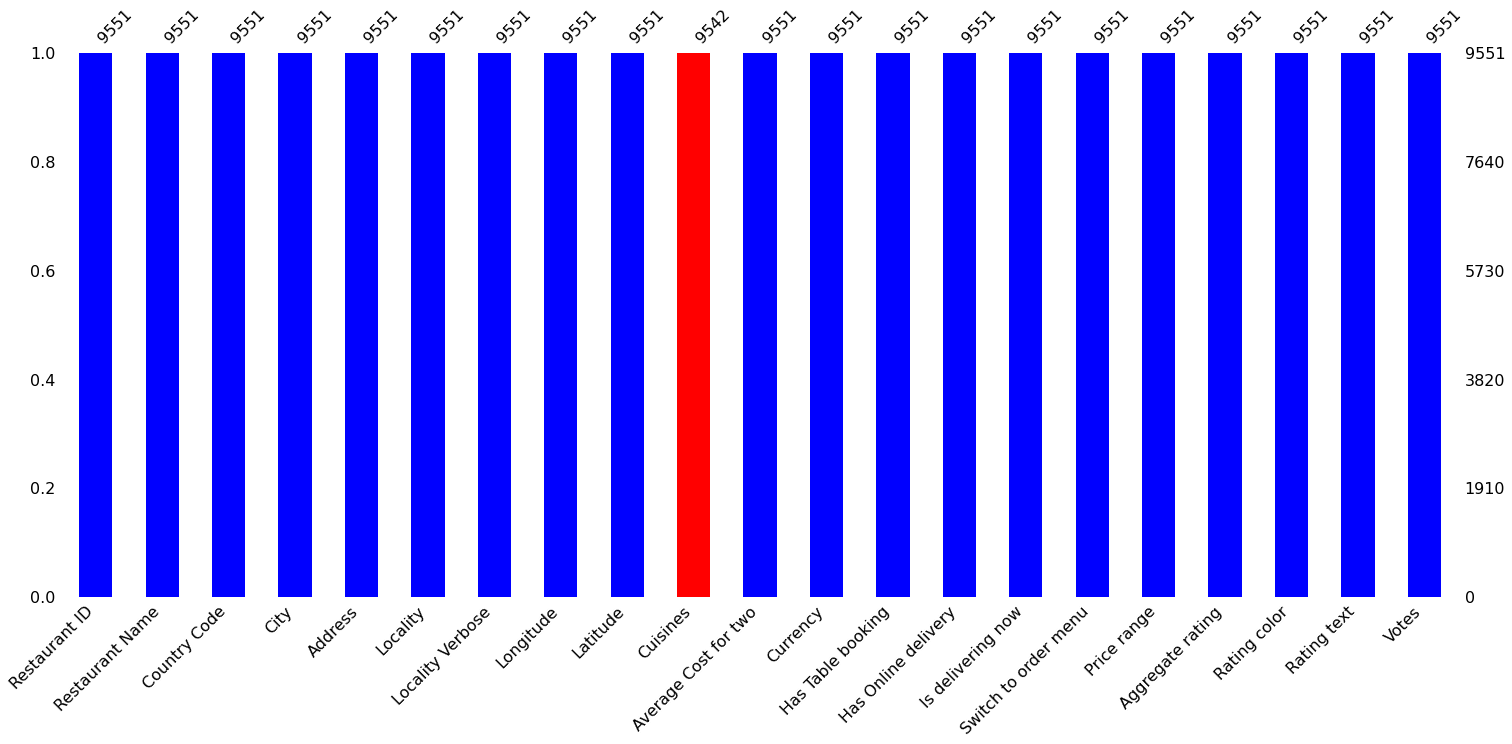

In [58]:
# Visulalization of missing values of dataset
color = []
for col in df1.columns:
    if df1[col].isna().sum() >0:
        color.append("red")
    else:
        color.append("blue")
mns.bar(df1,color=color)
plt.show()

There is only one column which has only 9 missing values. as, It will not create that much impact on our dataset we will drop that rows.

In [59]:
# Drop null values
df1.dropna(inplace=True)

In [60]:
# Check for the duplicated values
df1.duplicated().sum()

0

### Loading the Dataset-2:

In [61]:
df2=pd.read_excel('Country_Code.xlsx')
print("Rows, columns: " + str(df2.shape))
df2.head()

Rows, columns: (15, 2)


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


As we have country code column in both dataset we can join this both dataset and can get country names in main dataset.

### Merging the Dataframes:

In [62]:
# Join both dataset on Country Code Column
df3 = df1.merge(df2,on="Country Code",how='left')
df3.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Univariate, Biavariate and Multivariate Analysis:

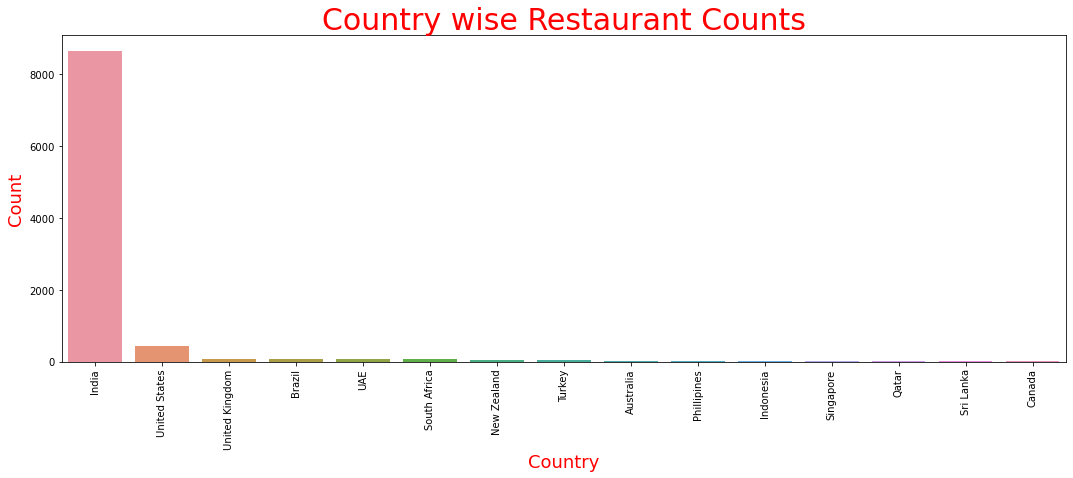

In [63]:
# Let's see top countries which are using zomato
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

sns.countplot(x="Country",data=df3,order = df3['Country'].value_counts().index)
plt.xticks(rotation='vertical')
plt.xlabel("Country",{"color":"red"},size=18)
plt.ylabel("Count",{"color":"red"},size=18)
plt.title("Country wise Restaurant Counts",size=30,color='red')
plt.show()

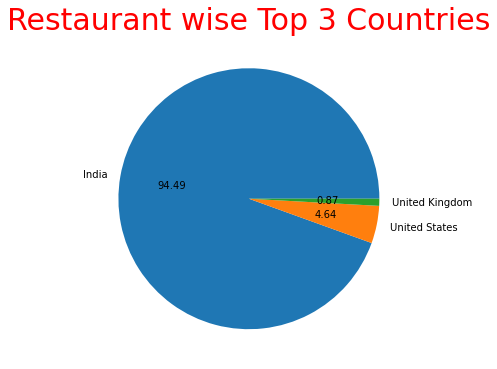

In [64]:
# Let's see top 3 Countries Percentage using Pie Chart
labels = df3.Country.value_counts().index
values = df3.Country.value_counts().values

plt.figure(figsize=(18,6))
plt.pie(values[:3],labels=labels[:3],autopct='%.2f')
plt.title("Restaurant wise Top 3 Countries",size=30,color='red')
plt.show()

We can clearly see that there is around 94% Restaurants are in India. So, as per the data we can conclude that Zomato is used by many people in India and zomato has very huge Market size in India compare to other Countries.

In [66]:
df3.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [67]:
# Finding Rating Count using GroupBy
ratings = df3.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


### Observation:

1. When rating is between 4.5 to 4.9 ---> Excellent
2. When rating is between 4.5 to 4.9 ---> Very Good
3. When rating is between 3.5 to 3.9 ---> Good
4. When rating is between 2.5 to 3.4 ---> Average
5. When rating is between 1.8 to 2.4 ---> Poor

There is 2148 of the Rating are 0 which is Not Rated by Any Users.

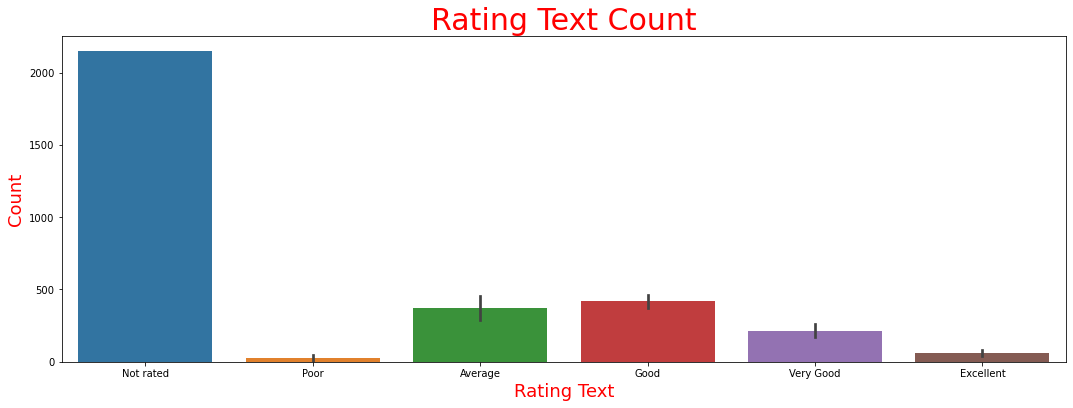

In [68]:
# Rating Text Countplot
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,6)

sns.barplot(x="Rating text",y="Rating Count",data=ratings)
plt.xlabel("Rating Text",{"color":"red"},size=18)
plt.ylabel("Count",{"color":"red"},size=18)
plt.title("Rating Text Count",size=30,color='red')
plt.show()

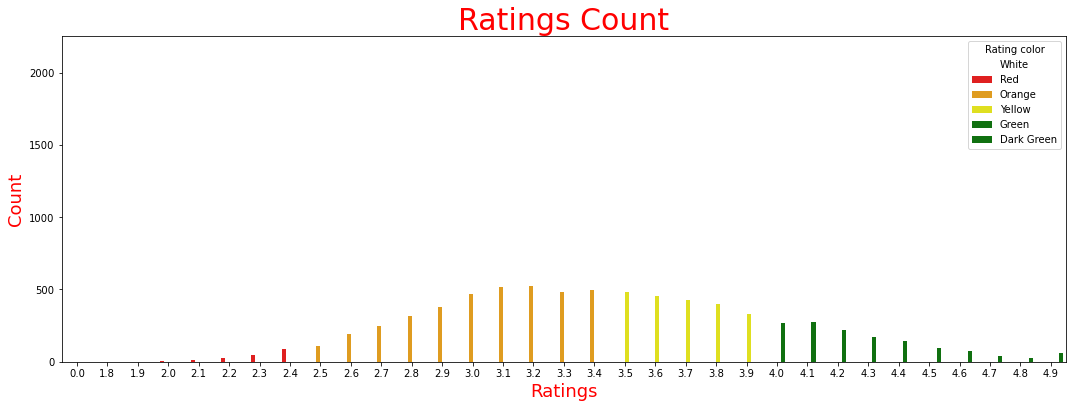

In [69]:
# Ratings Countplot with Colour Mapping
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings,hue="Rating color",palette=['white','red','orange','yellow','green','green'])
plt.xlabel("Ratings",{"color":"red"},size=18)
plt.ylabel("Count",{"color":"red"},size=18)
plt.title("Ratings Count",size=30,color='red')
plt.show()

From above both charts we can conclude that most of the reviews by users are Average ( 2.5 to 3.4 ) and Good ( 3.5 to 3.9 ). There is So many Reviews which are not Rated by users.

In [70]:
# Find the countries name which has given 0 ratings
country_count = df3[df3['Aggregate rating']==0.0].Country.value_counts().reset_index().rename(columns={'index':'Country','Country':'Count'})
country_count

,Country,Count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


We can clearly see that, Maximum Number of 0 ratings are from Indian Customers.

In [71]:
# Find out which Currency is used by which Country
country_currency = df3[["Country","Currency"]].groupby(["Country","Currency"]).size().reset_index()[["Country","Currency"]]
country_currency

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


Above are listed all the currencies which is used in different Countries.

In [73]:
# Top 10 Cities from all world which has maximum Restaurants
city_restaurants = df3[["Country","City","Restaurant ID"]].groupby(["Country","City"]).count().reset_index()[["Country","City","Restaurant ID"]].sort_values("Restaurant ID",ascending=False).rename(columns={'Restaurant ID':'Count'})[:10]
city_restaurants

,Country,City,Count
61,India,New Delhi,5473
45,India,Gurgaon,1118
62,India,Noida,1080
42,India,Faridabad,251
43,India,Ghaziabad,25
53,India,Lucknow,21
33,India,Amritsar,21
46,India,Guwahati,21
37,India,Bhubaneshwar,21
31,India,Ahmedabad,21


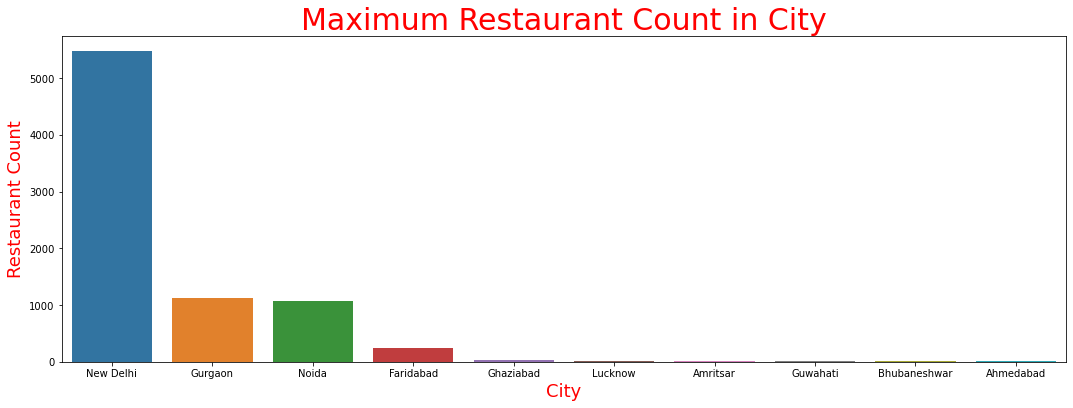

In [74]:
# Visulaize that 10 Cities with Maximum Restaurants
sns.barplot(x="City",y="Count",data=city_restaurants)
plt.xlabel("City",{"color":"red"},size=18)
plt.ylabel("Restaurant Count",{"color":"red"},size=18)
plt.title("Maximum Restaurant Count in City",size=30,color='red')
plt.show()

### Analysis from above Chart:

1. All the Cities which has Maximum Restaurants are from India.
2. New Delhi has Maximum Restaurants then Gurgaon and then Noida.

In [75]:
# Let's Analyze which City has Maximum Price Range
highPrice_city = df3.groupby(['Country','City']).mean()['Price range'].reset_index().sort_values("Price range",ascending=False)[:10]
highPrice_city.style.set_properties(**{'color': 'red'})

,Country,City,Price range
81,Phillipines,Pasay City,4.000000
28,Canada,Vineland Station,4.000000
92,South Africa,Johannesburg,4.000000
91,South Africa,Inner City,4.000000
130,United States,Princeton,4.000000
63,India,Panchkula,4.000000
17,Australia,Paynesville,4.000000
95,South Africa,Sandton,3.818182
80,Phillipines,Mandaluyong City,3.750000
93,South Africa,Pretoria,3.700000


Top 10 Cities with Maximum(mean) Price Range.

- South Africa has 4 Cities with High Price range.

In [76]:
# Let's Analyze which City has Minimum Price Range
lowPrice_city = df3.groupby(['Country','City']).mean()['Price range'].reset_index().sort_values("Price range",ascending=False)[-10:]
lowPrice_city.style.set_properties(**{'color': 'green'})

,Country,City,Price range
42,India,Faridabad,1.454183
114,United States,Dalton,1.400000
123,United States,Mc Millan,1.000000
10,Australia,Lakes Entrance,1.000000
9,Australia,Inverloch,1.000000
120,United States,Lakeview,1.000000
118,United States,Fernley,1.000000
111,United States,Clatskanie,1.000000
3,Australia,Dicky Beach,1.000000
136,United States,Vernonia,1.000000


Top 10 Cities with Minimum(mean) Price Range.

- United States has 6 Cities with Low Price range.
- Australia has 3 Cities and India has 1 City with low Price range.

In [78]:
# Let's see top 10 Cuisines
df3.groupby('Cuisines').size().reset_index().sort_values(0,ascending=False).rename(columns={0:'Count'})[:10]

,Cuisines,Count
1306,North Indian,936
1329,"North Indian, Chinese",511
497,Chinese,354
828,Fast Food,354
1514,"North Indian, Mughlai",334
331,Cafe,299
177,Bakery,218
1520,"North Indian, Mughlai, Chinese",197
186,"Bakery, Desserts",170
1749,Street Food,149


We can see top 10 cuisines and conclude that North Indian and Chinese are quite top cuisines which is ordered from zomato. It's Obvious because 94% Restaurants are available in India.

In [79]:
# Let's check that Cities which are currently delivering orders
df3[df3['Is delivering now']=='Yes'].groupby(["Country","City"]).count()["Is delivering now"].reset_index()

,Country,City,Is delivering now
0,India,Chandigarh,1
1,India,Gurgaon,12
2,India,New Delhi,16
3,India,Noida,5


### Conclusion:

We can clearly see there is Only 4 Cities Chandigarh, Gurgaon, New Delhi and Noida has that Restaurants which are Delivering Orders Currently, that all 4 Cities are located in India.